## Q3 Ridge Regression Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the combined .npy data
train_data = np.load("train.npy")
val_data = np.load("val.npy")
test_data = np.load("test.npy")

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_val, y_val = val_data[:, :-1], val_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]


### Parts (a) and (b) Ridge Implementation 

In [2]:
class RidgeRegressor:
    """
    A simple implementation of Ridge regression
    compatible with scikit-learn's fit/predict interface.
    """
    def __init__(self,lmbda=0):
        self.lmbda=lmbda
        self.w = None
        self.b = None

    def fit(self, X, y):
        """
        Fit the Ridge model.
        Parameters:
            X: np.ndarray, shape (n_samples, n_features)
            y: np.ndarray, shape (n_samples,)
        """
        #Add your code here for (b)
        n_samples, n_features = X.shape
        X_dash = np.column_stack([X, np.ones(n_samples)])
        big_lmbda = np.zeros((n_features + 1, n_features + 1))
        big_lmbda[:n_features, :n_features] = self.lmbda * np.eye(n_features)
        
        XT_X = X_dash.T @ X_dash
        XT_X_new = XT_X + n_samples * big_lmbda
        XT_Y = X_dash.T @ y
        
        theta = np.linalg.solve(XT_X_new, XT_Y)
        self.w = theta[:n_features]
        self.b = theta[n_features] 

    def predict(self, X):
        """
        Predict using the Ridge model.
        Parameters:
            X: np.ndarray, shape (n_samples, n_features)
        Returns:
            y_pred: np.ndarray, shape (n_samples,)
        """
        #Add your code here for (a)
        return X @ self.w + self.b


### Part (c) lambda=0 check

In [4]:
#Add code here
from sklearn.metrics import mean_squared_error

ridge0 = RidgeRegressor(lmbda=0)
ridge0.fit(X_train, y_train)
ytr_pred_ridge0 = ridge0.predict(X_train)
yval_pred_ridge0 = ridge0.predict(X_val)
ytest_pred_ridge0 = ridge0.predict(X_test)

ridge0_trainmse= mean_squared_error(y_train, ytr_pred_ridge0)
ridge0_valmse = mean_squared_error(y_val, yval_pred_ridge0)
ridge0_testmse = mean_squared_error(y_test, ytest_pred_ridge0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
ytr_pred_linreg = linreg.predict(X_train)
yval_pred_linreg = linreg.predict(X_val)
ytest_pred_linreg = linreg.predict(X_test)

train_mse_sklearn = mean_squared_error(y_train, ytr_pred_linreg)
val_mse_sklearn = mean_squared_error(y_val, yval_pred_linreg)
test_mse_sklearn = mean_squared_error(y_test, ytest_pred_linreg)

print("Ridge Regression for λ=0")
print(f"Training MSE   : {ridge0_trainmse:.6f}")
print(f"Validation MSE : {ridge0_valmse:.6f}")
print(f"Testing MSE    : {ridge0_testmse:.6f}")

print("\nLinear Regression with Sklearn")
print(f"Training MSE   : {train_mse_sklearn:.6f}")
print(f"Validation MSE : {val_mse_sklearn:.6f}")
print(f"Testing MSE    : {test_mse_sklearn:.6f}")

print(f"\nDifferences")
print(f"Training MSE difference   : {abs(ridge0_trainmse - train_mse_sklearn):.10f}")
print(f"Validation MSE difference : {abs(ridge0_valmse - val_mse_sklearn):.10f}")
print(f"Testing MSE difference    : {abs(ridge0_testmse - test_mse_sklearn):.10f}")


Ridge Regression for λ=0
Training MSE   : 9.018945
Validation MSE : 10.915241
Testing MSE    : 8.172262

Linear Regression with Sklearn
Training MSE   : 9.018945
Validation MSE : 10.915241
Testing MSE    : 8.172262

Differences
Training MSE difference   : 0.0000000000
Validation MSE difference : 0.0000000000
Testing MSE difference    : 0.0000000000


### Part (d) lambda -> infinity check

In [8]:
#Add code here

class ConstantRegressor:
    """
    A constant regressor a model that predicts a constant value for all inputs
    """
    def __init__(self):
        self.constant = None
    
    def fit(self, X, y):
        self.constant = np.mean(y)  
    
    def predict(self, X):
        return np.full(X.shape[0], self.constant)

ridgeinf = RidgeRegressor(lmbda=1e5)
ridgeinf.fit(X_train, y_train)
ytr_pred_ridgeinf = ridgeinf.predict(X_train)
yval_pred_ridgeinf = ridgeinf.predict(X_val)
ytest_pred_ridgeinf = ridgeinf.predict(X_test)

ridgeinf_trainmse = mean_squared_error(y_train, ytr_pred_ridgeinf)
ridgeinf_valmse = mean_squared_error(y_val, yval_pred_ridgeinf)
ridgeinf_testmse = mean_squared_error(y_test, ytest_pred_ridgeinf)

cr = ConstantRegressor()
cr.fit(X_train, y_train)
ytr_pred_cr= cr.predict(X_train)
yval_pred_cr= cr.predict(X_val)
ytest_pred_cr= cr.predict(X_test)


cr_trainmse = mean_squared_error(y_train, ytr_pred_cr)
cr_valmse = mean_squared_error(y_val, yval_pred_cr)
cr_testmse = mean_squared_error(y_test, ytest_pred_cr)

print("Ridge Regression for λ = inf")
print(f"Training MSE   : {ridgeinf_trainmse:.6f}")
print(f"Validation MSE : {ridgeinf_valmse:.6f}")
print(f"Testing MSE    : {ridgeinf_testmse:.6f}")

print("\nConstant Regressor")
print(f"Training MSE   : {cr_trainmse:.6f}")
print(f"Validation MSE : {cr_valmse:.6f}")
print(f"Testing MSE    : {cr_testmse:.6f}")

print(f"\nDifferences")
print(f"Training MSE difference   : {abs(ridgeinf_trainmse - cr_trainmse):.6f}")
print(f"Validation MSE difference : {abs(ridgeinf_valmse - cr_valmse):.6f}")
print(f"Testing MSE difference    : {abs(ridgeinf_testmse - cr_testmse):.6f}")


Ridge Regression for λ = inf
Training MSE   : 18.153434
Validation MSE : 23.546710
Testing MSE    : 17.601556

Constant Regressor
Training MSE   : 18.154164
Validation MSE : 23.547586
Testing MSE    : 17.602384

Differences
Training MSE difference   : 0.000730
Validation MSE difference : 0.000876
Testing MSE difference    : 0.000828


### Parts (e) and (f) Hyper-paramter optimization experiment

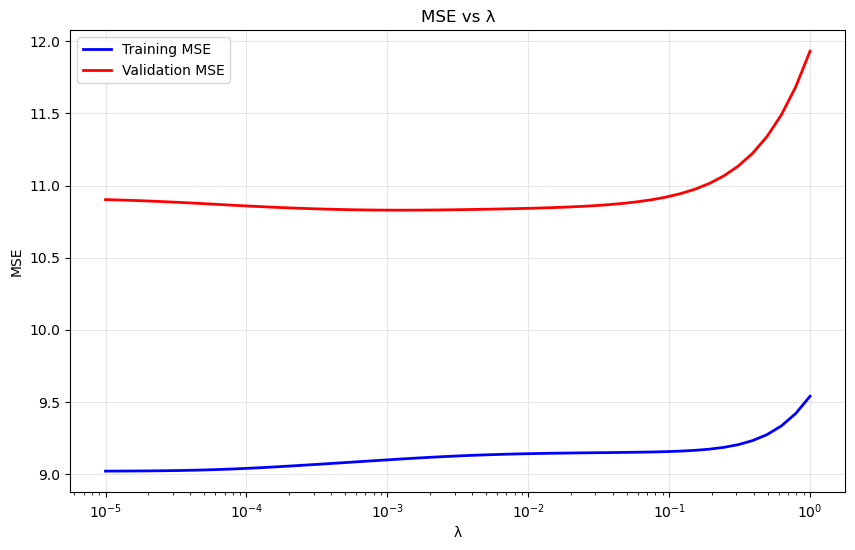

Optimal value for λ: 0.001099

Optimal model
Training MSE   : 9.100203
Validation MSE : 10.829396
Testing MSE    : 7.875197


In [11]:
lmbdas = np.logspace(-5, 0, 50)

msetrainarr,msevalarr,msetestarr = [],[],[]

for lmbda in lmbdas:
    ridge = RidgeRegressor(lmbda=lmbda)
    ridge.fit(X_train, y_train)
    ytr_pred = ridge.predict(X_train)
    yval_pred = ridge.predict(X_val)
    ytest_pred = ridge.predict(X_test)
    msetrain = mean_squared_error(y_train, ytr_pred)
    mseval = mean_squared_error(y_val, yval_pred)
    msetest = mean_squared_error(y_test, ytest_pred)
    msetrainarr.append(msetrain)
    msevalarr.append(mseval)
    msetestarr.append(msetest)

msetrainarr = np.array(msetrainarr)
msevalarr = np.array(msevalarr)
msetestarr = np.array(msetestarr)
opt = np.argmin(msevalarr)
optimal_lmbda = lmbdas[opt]
msetrain_opt = msetrainarr[opt]
mseval_opt = msevalarr[opt]
msetest_opt = msetestarr[opt]

plt.figure(figsize=(10, 6))
plt.semilogx(lmbdas, msetrainarr, 'b-', label='Training MSE', linewidth=2)
plt.semilogx(lmbdas, msevalarr, 'r-', label='Validation MSE', linewidth=2)
plt.xlabel('λ')
plt.ylabel('MSE')
plt.title('MSE vs λ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Optimal value for λ: {optimal_lmbda:.6f}")

print(f"\nOptimal model")
print(f"Training MSE   : {msetrain_opt:.6f}")
print(f"Validation MSE : {mseval_opt:.6f}")
print(f"Testing MSE    : {msetest_opt:.6f}")
